In [4]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20,8)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [6]:
img_size = 100
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training',target_size=(img_size, img_size),batch_size=batch_size,shuffle=True,class_mode='sparse')
test_generator = test_datagen.flow_from_directory('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test',target_size=(img_size, img_size),batch_size=batch_size,shuffle=False,class_mode='sparse')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [18]:
from pathlib import Path
import os.path

train_dir = Path('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [19]:
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)

print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)


Number of pictures: 67692

Number of different labels: 131

Labels: ['Cherry Rainier' 'Pomegranate' 'Apple Braeburn' 'Nectarine'
 'Grape White 3' 'Salak' 'Cantaloupe 1' 'Pepper Green' 'Grapefruit Pink'
 'Tomato 1' 'Mangostan' 'Pear Williams' 'Pear Stone' 'Banana' 'Orange'
 'Apple Crimson Snow' 'Kohlrabi' 'Pepino' 'Tomato 3' 'Tomato Yellow'
 'Apple Red Yellow 1' 'Strawberry Wedge' 'Apple Red Yellow 2' 'Tamarillo'
 'Pear Forelle' 'Papaya' 'Apple Red 1' 'Mandarine' 'Pepper Yellow'
 'Raspberry' 'Cherry 2' 'Apple Golden 1' 'Mango' 'Pineapple'
 'Tomato Cherry Red' 'Potato Sweet' 'Pear Abate' 'Melon Piel de Sapo'
 'Fig' 'Chestnut' 'Apple Red 3' 'Grape Pink' 'Beetroot' 'Cocos'
 'Redcurrant' 'Pear 2' 'Physalis with Husk' 'Plum 3' 'Cantaloupe 2'
 'Cherry Wax Black' 'Pineapple Mini' 'Banana Lady Finger'
 'Tomato not Ripened' 'Grape Blue' 'Potato Red' 'Nut Pecan' 'Kiwi'
 'Rambutan' 'Ginger Root' 'Pear Kaiser' 'Cherry Wax Red' 'Carambula'
 'Tomato 4' 'Pepper Red' 'Grapefruit White' 'Nectarine Flat'

,Filepath,Label
0,/kaggle/input/fruits/fruits-360_dataset/fruits...,Cherry Rainier
1,/kaggle/input/fruits/fruits-360_dataset/fruits...,Pomegranate
2,/kaggle/input/fruits/fruits-360_dataset/fruits...,Apple Braeburn
3,/kaggle/input/fruits/fruits-360_dataset/fruits...,Nectarine
4,/kaggle/input/fruits/fruits-360_dataset/fruits...,Grape White 3


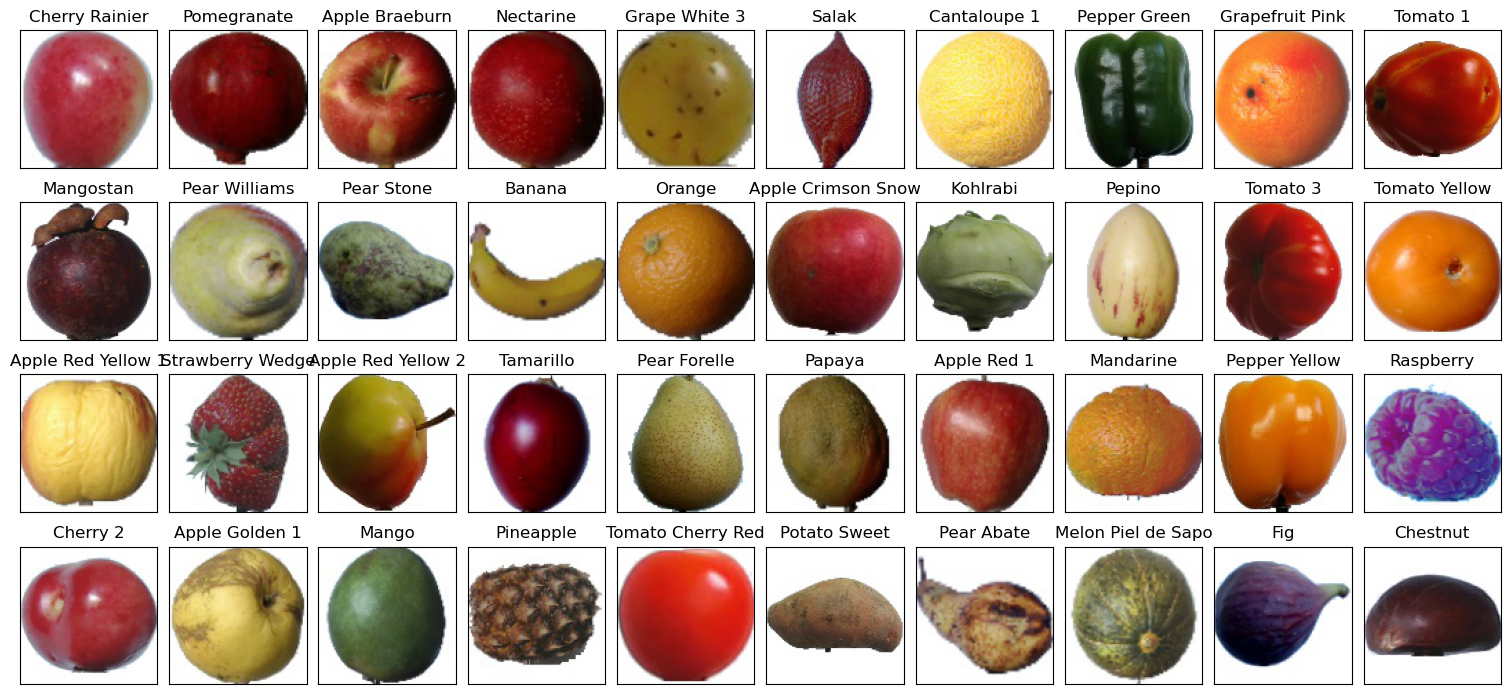

In [20]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(131, activation = 'softmax'))


model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)     

In [14]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10) 
# if training accuracy is higher than val accuracy -> overfitting

Epoch 1/10
2116/2116 [==============================] - 266s 126ms/step - loss: 0.2540 - accuracy: 0.9141 - val_loss: 0.1705 - val_accuracy: 0.9610
Epoch 2/10
2116/2116 [==============================] - 262s 124ms/step - loss: 0.2008 - accuracy: 0.9322 - val_loss: 0.1658 - val_accuracy: 0.9483
Epoch 3/10
2116/2116 [==============================] - 268s 127ms/step - loss: 0.1686 - accuracy: 0.9442 - val_loss: 0.1477 - val_accuracy: 0.9621
Epoch 4/10
2116/2116 [==============================] - 266s 126ms/step - loss: 0.1330 - accuracy: 0.9563 - val_loss: 0.0968 - val_accuracy: 0.9817
Epoch 5/10
2116/2116 [==============================] - 260s 123ms/step - loss: 0.1244 - accuracy: 0.9601 - val_loss: 0.0616 - val_accuracy: 0.9829
Epoch 6/10
2116/2116 [==============================] - 261s 123ms/step - loss: 0.1188 - accuracy: 0.9618 - val_loss: 0.0855 - val_accuracy: 0.9764
Epoch 7/10
2116/2116 [==============================] - 261s 123ms/step - loss: 0.1034 - accuracy: 0.9676 - val_

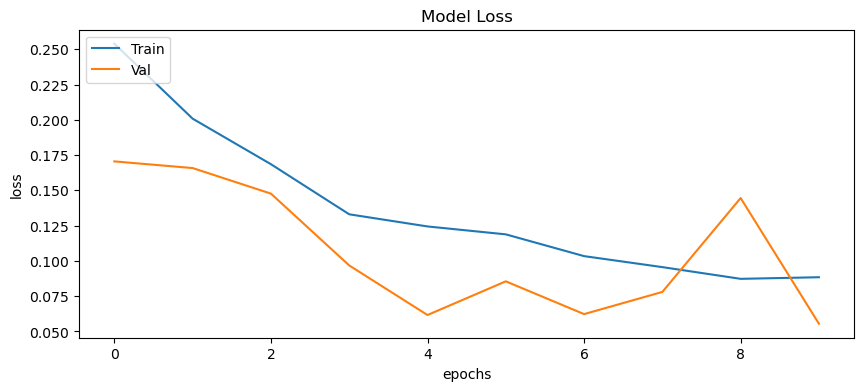

In [15]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

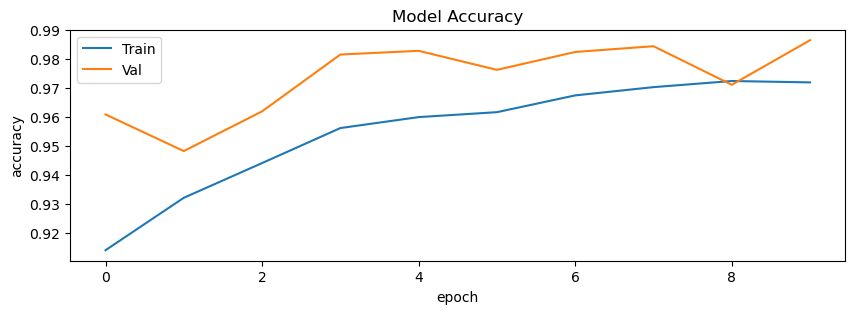

In [16]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [35]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

709/709 [==============================] - 46s 64ms/step
The first 5 predictions: ['Apple Red Yellow 2', 'Grapefruit White', 'Plum 3', 'Pear Abate', 'Strawberry Wedge']


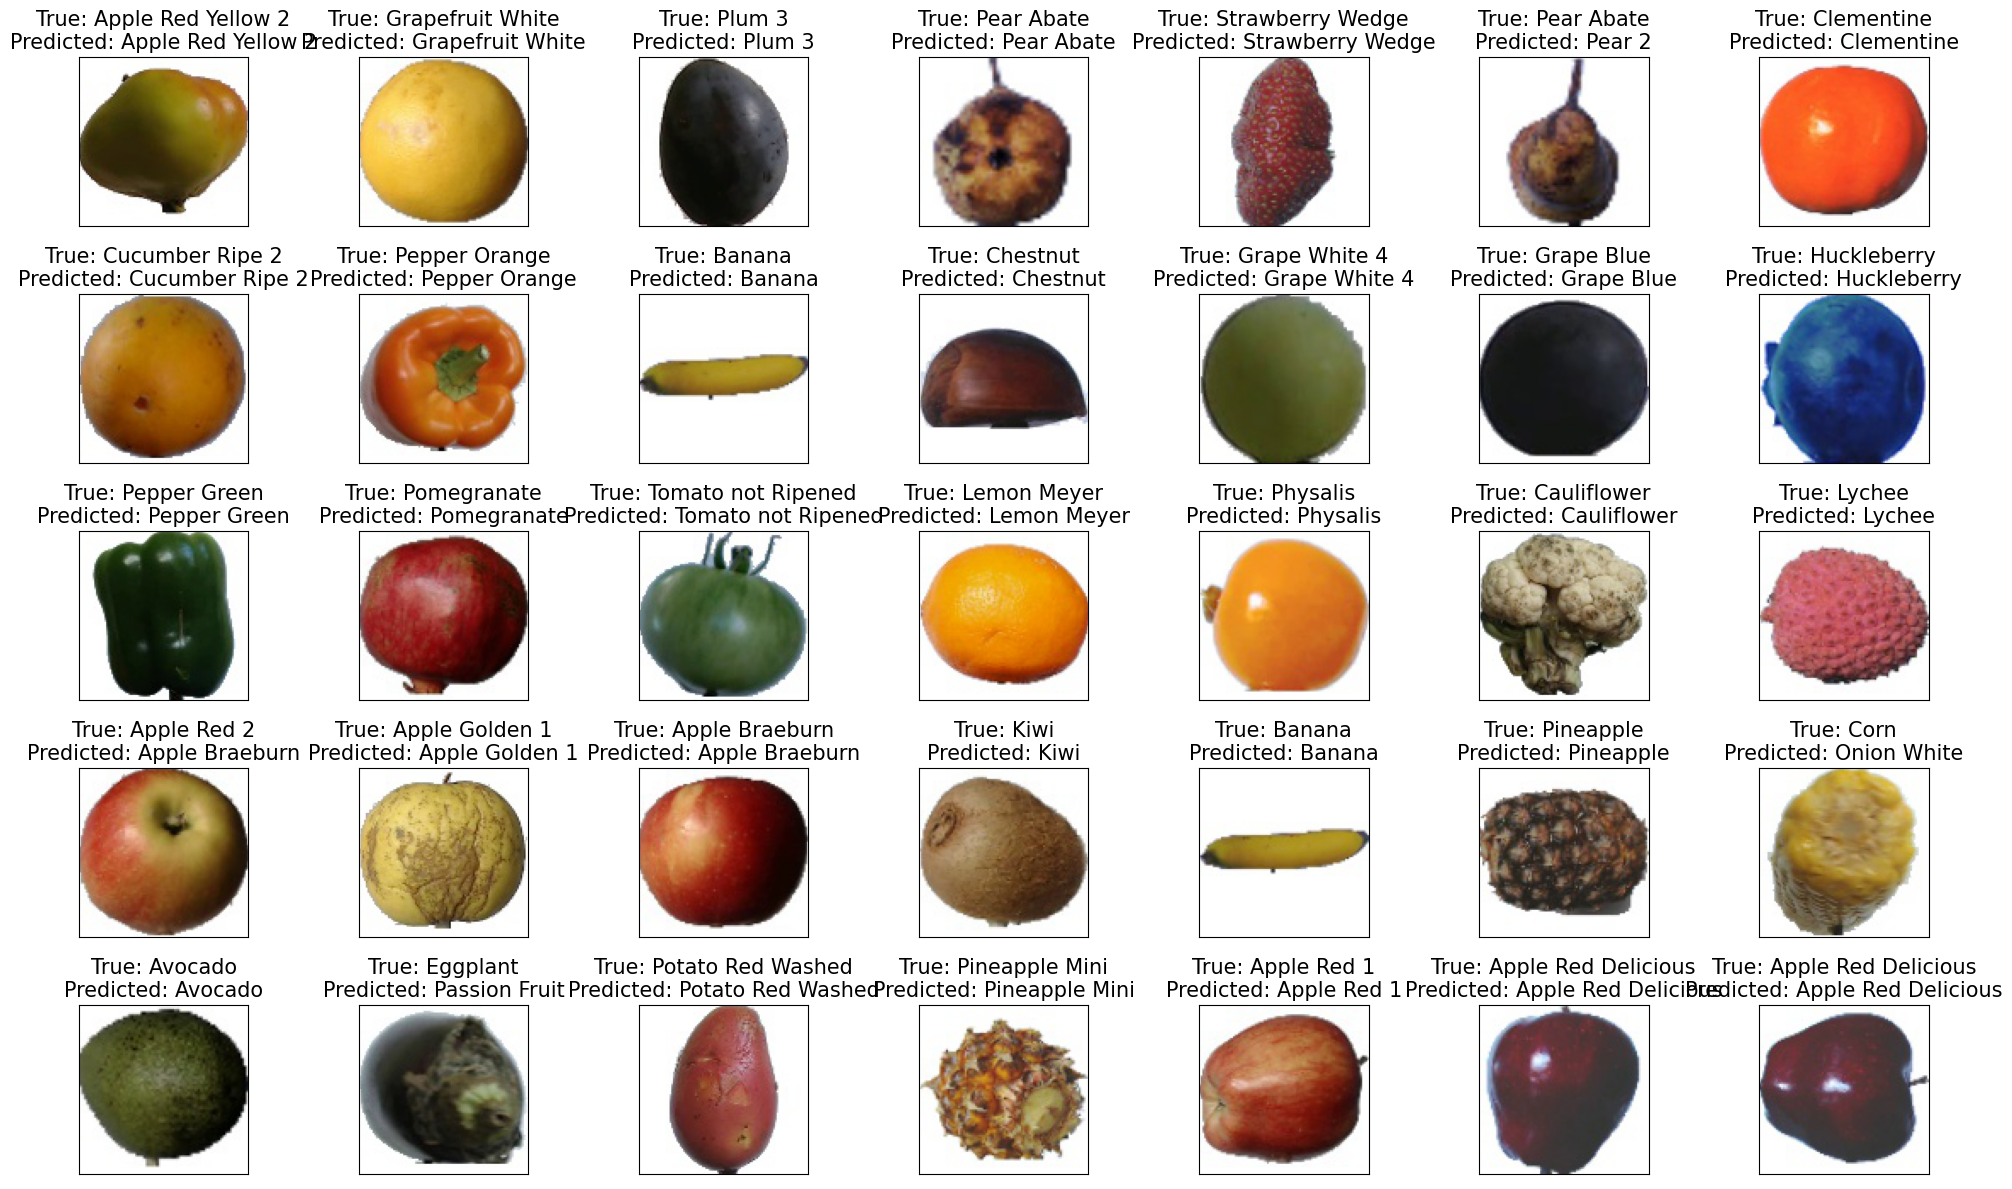

In [36]:
# Display 50 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(20, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}", fontsize = 15)
plt.tight_layout()
plt.show()